<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Clustering_KMeans_FCM_VIX%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip show matplotlib 

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, kiwisolver, pyparsing, python-dateutil, cycler
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [2]:
import matplotlib

In [3]:
# supresses future warnings
import warnings
warnings.simplefilter(action='ignore')

#import pandas library for df creation
import pandas as pd

#import the numpy library to use random package
import numpy as np
import math

#import the matplotlib library for plotting
import matplotlib.pyplot as plt

#set plt style
plt.style.use('seaborn-whitegrid')

#use the magic function to ensure plots render in a notebook
%matplotlib inline

#Import the seaborn library for plotting
import seaborn as sns

#for data scaling
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#for pca
from sklearn.decomposition import PCA

#importing necessary libraries for ward linkage and clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_excel("/content/drive/MyDrive/PhD research/VIX_daily.xlsx", index_col='Date')

In [6]:
df

,Last Price
Date,
2022-04-20,21.19
2022-04-19,21.37
2022-04-18,22.17
2022-04-14,22.70
2022-04-13,21.82
...,...
1990-01-08,20.26
1990-01-05,20.11
1990-01-04,19.22


In [7]:
df.isnull().any()

Last Price    False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8136 entries, 2022-04-20 to 1990-01-02
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Last Price  8136 non-null   float64
dtypes: float64(1)
memory usage: 127.1 KB


In [9]:
len(df)

8136

In [ ]:
#VIX_daily = df[["Date", "Last Price"]]

In [ ]:
#VIX_daily=VIX_daily.dropna()

In [ ]:
#VIX_daily

,Date,Last Price
0,20/04/2022,21.19
1,19/04/2022,21.37
2,18/04/2022,22.17
3,14/04/2022,22.70
4,13/04/2022,21.82
...,...,...
8131,08/01/1990,20.26
8132,05/01/1990,20.11
8133,04/01/1990,19.22
8134,03/01/1990,18.19


In [ ]:
#VIX_daily.isnull().any()

Date          False
Last Price    False
dtype: bool

In [ ]:
#VIX_daily=VIX_daily.dropna()

In [ ]:
#VIX_daily

,Date,Last Price
0,20/04/2022,21.19
1,19/04/2022,21.37
2,18/04/2022,22.17
3,14/04/2022,22.70
4,13/04/2022,21.82
...,...,...
8131,08/01/1990,20.26
8132,05/01/1990,20.11
8133,04/01/1990,19.22
8134,03/01/1990,18.19


In [ ]:
#VIX_daily['Date'] = (VIX_daily['Date'].apply(lambda x: float(x[0].replace(',', ''))))

In [10]:
# importing Library
from sklearn.cluster import KMeans

#getting labels
kmean = KMeans()
kmean.fit(df)
labels=kmean.labels_

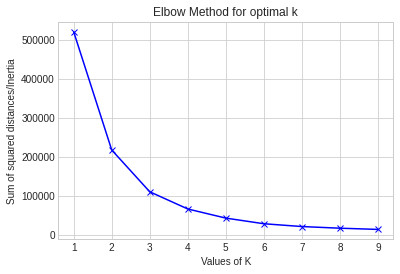

In [11]:
#elbow method
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method for optimal k')
plt.show()

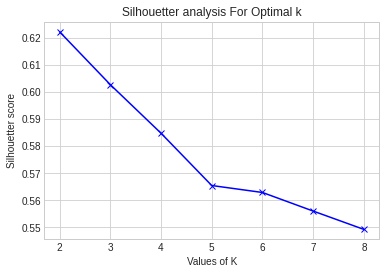

In [13]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

  #initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  cluster_labels = kmeans.labels_

  # silhouette score

  silhouette_avg.append(silhouette_score(df, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouetter score')
plt.title('Silhouetter analysis For Optimal k')
plt.show()  

In [14]:
# number of clusters 5
# PCA data with 5 clusters
clusterer = KMeans(n_clusters=5, random_state=42).fit(df)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df)
print(centers)

[[26.81939959]
 [19.69309811]
 [13.48929072]
 [62.16890411]
 [38.19894207]]


In [15]:
ps1 = pd.DataFrame(df)
ps1.head()

,Last Price
Date,
2022-04-20,21.19
2022-04-19,21.37
2022-04-18,22.17
2022-04-14,22.70
2022-04-13,21.82


['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'blue', 'blue', 'blue']


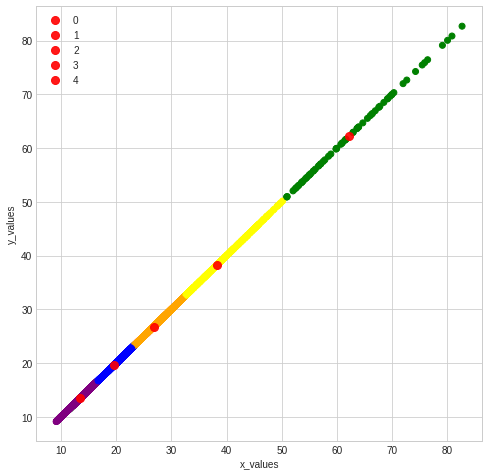

In [16]:
## Plotting the K mean Cluster
tocluster = pd.DataFrame(ps1)
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green','yellow']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster,tocluster,  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c, c, 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [29]:
# plotting the K Mean Cluster

#tocluster = pd.DataFrame(ps1)
#fig = plt.figure(figsize=(8,8))
#colors = ['orange','blue','purple','green','yellow']
#colored = [colors[k] for k in c_preds]
#c = colored/255
#col = np.random.random(size=(16272,2))
#print (col[0:16272])
#sc.scatter(np.arange(len(values)), values, c = colors/255)
#plt.scatter(x=tocluster, y=tocluster, c=col[:,0])
#for ci,c in enumerate(centers):
#    plt.plot(c, c, 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

#plt.xlabel('x_values')
#plt.ylabel('y_values')
#plt.legend()
#plt.show()

In [18]:
# Calculate Silhouette Score
score = silhouette_score(df,labels, metric='euclidean')
#Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.544


In [19]:
df1 = df.to_numpy()

In [28]:
!pip install pyfuzzyset
!pip install fuzzy-c-means


from fcmeans import FCM

my_model = FCM(n_clusters=5) #  use 5 clusters as an example
my_model.fit(df1) # X, numpy array, row:samples columns:features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
centers = my_model.centers
labels = my_model.predict(df1)

['yellow', 'yellow', 'green', 'green', 'green', 'green', 'green', 'yellow', 'yellow', 'green']


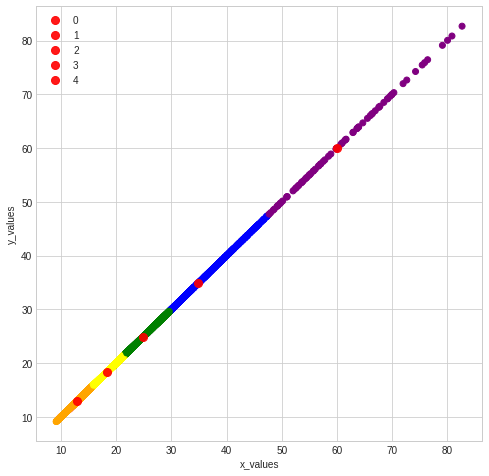

In [22]:
# plotting the Fuzzy C mean Cluster
tocluster = pd.DataFrame(df1)
fig = plt.figure(figsize=(8,8))
colors = ['orange', 'blue', 'purple', 'green', 'yellow']
colored = [colors[k] for k in labels]
print (colored[0:10])
plt.scatter(tocluster, tocluster, color=colored)
for ci, c in enumerate(centers):
  plt.plot(c, c, 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()


In [27]:
# plotting the K Mean Cluster

#tocluster = pd.DataFrame(df1)
#fig = plt.figure(figsize=(8,8))
#colors = ['orange','blue','purple','green','yellow']
#colored = [colors[k] for k in c_preds]
#c = colored/255
#col = np.random.random(size=(16272,2))
#print (col[0:10])
#sc.scatter(np.arange(len(values)), values, c = colors/255)
#plt.scatter(x=tocluster, y=tocluster, c=col[:,0])
#for ci,c in enumerate(centers):
#    plt.plot(c, c, 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

#plt.xlabel('x_values')
#plt.ylabel('y_values')
#plt.legend()
#plt.show()

In [26]:
# Calculate Silhouetter Score
score = silhouette_score(df1, labels, metric='euclidean')
#print the score
print('Silhoutter Score: %.3f' %score)

Silhoutter Score: 0.555
